# Machine Vision 2024/25 - Assignment 1: Basic Python and Application of Filters

This assignment will introduce you to python and the most important features you will need throughout the machine vision course.
&nbsp;


#### Part 1: Basic Python Functions

In python, packages are imported using the `import x` keyword. If you want to shorten its name, an alias can be used `import x as y`.
Additionally, if only a specific function is imported the `from` keyword is used.

This course heavily relies on the [NumPY](https://numpy.org/) library, which is the de-facto standard library for array computation in python.
&nbsp;

In [10]:
# @student: import the numpy library using the alias "np"
import numpy as np


Numpy offers implementations of common math functions like sin, cos, log, exp, sqrt, min, max, mean, and so on.

In [11]:
# @student: calculate the sin of 0.5
print(np.sin(0.5))

0.479425538604203


The array class `np.array` stores multidimensional values.

In [12]:
# The np.array([...]) constructor takes a list of elements as argument.
# @student: create an array containing the values from 0 to 10

print(np.array([0,1,2,3,4,5,6,7,8,9,10]))
print(np.array([number for number in range(0,11)]),end='\n\n') #Shorter sintax when we use Python's List Comprehension concept

# Numpy also offers the numpy.arange() and numpy.linspace() functions which both offer the functionality
# to create arrays containing a range of values.
# @student: create an array containing the values from 0 to 10 using numpy.arange() and numpy.linspace()

print(np.arange(11))
print(np.arange(0,11))
print(np.arange(0,11,1),end='\n\n') #The parameters are (initValue,endValue,STEP). The array will contain the numbers up to endValue-1

print(np.linspace(0,10,11)) #The parameters are (initValue,endValue,#SAMPLES). The array contains floating-point numbers

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


If an array is passed to a common math function like sine(x), the function is applied to each element individually.

In [13]:
# @student: calculate the sine of the interval from 0 to 2*pi.
x_values = np.linspace(0,2*np.pi,50)
y_values = np.sin(x_values)

The next package we will use is matplotlib. This package provides different visualization tools for data.

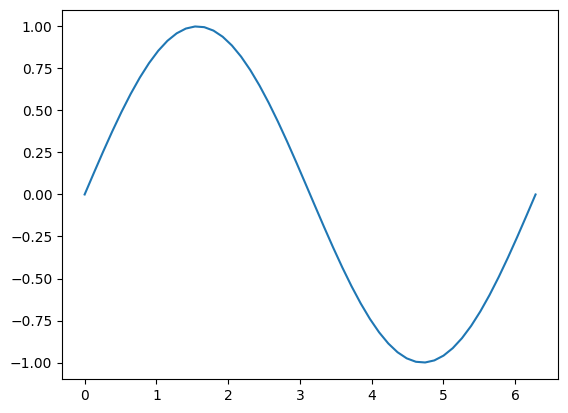

In [14]:
import matplotlib.pyplot as plt

# @student: plot the calculated sine wave
# the plt.plot(x, y) function takes x values as first argument and y values as second argument
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

plt.plot(x_values,y_values)
plt.show()

#### Part 2: Linear Algebra

In computer vision, linear algebra is frequently used. NumPy offers different algorithms on vectors/matrices.

$$\begin{bmatrix} 30 \\ 8 \\ 2 \end{bmatrix} = \begin{bmatrix} 3 & 5 & 1 \\ 2 & 0 & 1 \\ -1 & 1 & 0 \end{bmatrix} * \begin{bmatrix} 2 \\ 4 \\ 4 \end{bmatrix} $$

In [15]:
# @student: calculate the equation above using numpys arrays

# it is important NOT to use the * operator for matrix multiplication.
# For matrix multiplication the function np.matmul(m1, m2) exists. Please use
# this function as it performs the expected multiplication.

mtrx1 = np.array([[3,5,1],
                  [2,0,1],
                  [-1,1,0]])
mtrx2 = np.array([2,4,4]).transpose()
print(mtrx1)
print(mtrx2)

result =np.matmul(mtrx1,mtrx2)
print(result)

[[ 3  5  1]
 [ 2  0  1]
 [-1  1  0]]
[2 4 4]
[30  8  2]


Often, systems of equations in the form $Ax = b$ need to be solved for x. Numpy offers a variety of different functions to solve such systems.

In [16]:
from numpy.linalg import inv
# @student: solve using the inverse of A
x_inv = np.matmul(inv(mtrx1),result) #np.linalg.inv(A) calculates the inverse of the matrix 'A'
print(x_inv)

from numpy.linalg import solve
# @student: solve using np.linalg.solve
x_solve = solve(mtrx1,result) #np.linalg.solve(A,b) solves the lineal equation of the form Ax=b for x.
print(x_solve)

assert np.allclose(x_inv, mtrx2), "x_inv and x are not equal" #Assert determines if two arrays are equal element-wise within a margin
assert np.allclose(x_solve, mtrx2), "x_solve and x are not equal" #Assert will not throw an exeption if the two arrays are similar

[2. 4. 4.]
[2. 4. 4.]


#### Part 2: Images

We will use the [skimage](https://scikit-image.org/) library to load, store, and transform images. In skimage, images are stored as numpy arrays.
Therefore, we can use numpy functions on images and use the traditional numpy array indexing.

If you have no experience using numpy array indexing, please read this short guide [NumPY Array Indexing](https://www.w3schools.com/python/numpy/numpy_array_slicing.asp#:~:text=Slicing%20in%20python%20means%20taking,start%3Aend%3Astep%5D%20.)

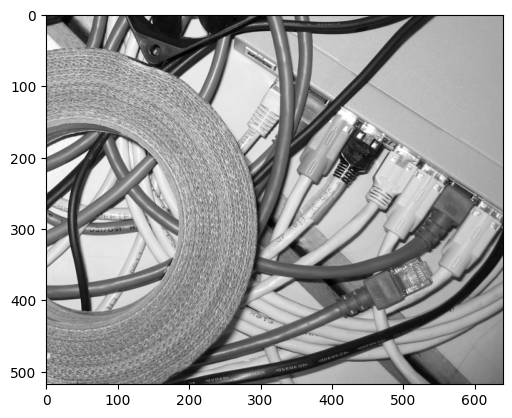

Image shape [v,u]: (518, 640)


In [17]:
import skimage

gray_img = skimage.io.imread("../res/cable_salat.png") #Relative path because of the structure of the project. Function returns numpy array
plt.imshow(gray_img, cmap='gray') #Set pyplot to plot a grayscale image
plt.show()

# It is highly important to understand the shape of an image
# The first dimension refers to the v axis, while the second dimension refers to the u axis
# The previous is due to how arrays' indexing works -> array[v,u] is in practice what in theory was g(u,v)
print(f"Image shape [v,u]: {gray_img.shape}")#We print the resolution of the image

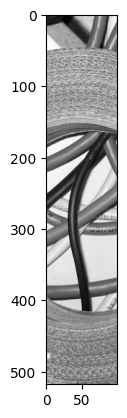

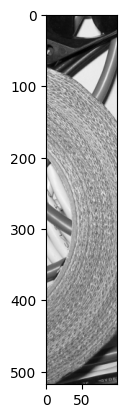

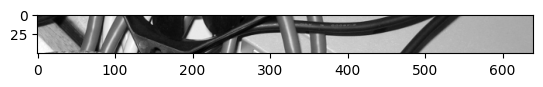

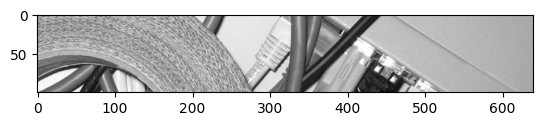

In [18]:
# @student: access all pixels where u < 100
plt.imshow(gray_img[:,:100], cmap="gray")
plt.show()

# @student: access all pixels where 150 < u < 250
plt.imshow(gray_img[:,150:250], cmap="gray")
plt.show()

# @student: access all pixels where v < 50
plt.imshow(gray_img[:50,:], cmap="gray")
plt.show()

# @student: access all pixels where 100 < v < 200
plt.imshow(gray_img[100:200,:], cmap="gray")
plt.show()

In [19]:
# @student: calculate min, max, and mean pixel values of the loaded image
# you are free to use all numpy functions

# The following numpy functions compute the calculations by default over a flattened array. That means: input array is collapsed to 1D
min = np.min(gray_img)
max = np.max(gray_img)
mean = np.mean(gray_img)

print(f"min gray value: {min}")
print(f"max gray value: {max}")
print(f"mean gray value: {mean}")

min gray value: 7
max gray value: 255
mean gray value: 149.84897140444016


Implement a euclidean distance function that calculates the euclidean distance between two matrices.

$ecd = \sqrt{ \sum_i (u_i - v_i)^2 } $, where $u$ and $v$ are two arrays of the same shape.

In [20]:
def ecd(u: np.ndarray, v: np.ndarray) -> np.ndarray: #Type hinting ist mostly used for documentation and tooling purposes
    assert u.shape == v.shape, f"shape of u {u.shape} does not equal shape of v {v.shape}"

    # @student: implement the euclidean distance function between two images
    ecd = np.sqrt(np.sum(np.power(np.subtract(u,v),2)))

    return ecd

r1 = ecd(np.array([10, 10, 10]), np.array([10, 10, 10]))
print(r1)

assert r1 == 0, "Wrong implementation of ecd"

r2 = ecd(np.array([10, 10, 10]), np.array([0, 0, 5]))

assert r2 == 15, "Wrong implementation of ecd"
print(r2)

0.0
15.0


#### Part 3: Salt And Pepper Noise

In the lecture, different noise types are discussed. In this exercise, you have to implement simulated salt and pepper noise on an image.

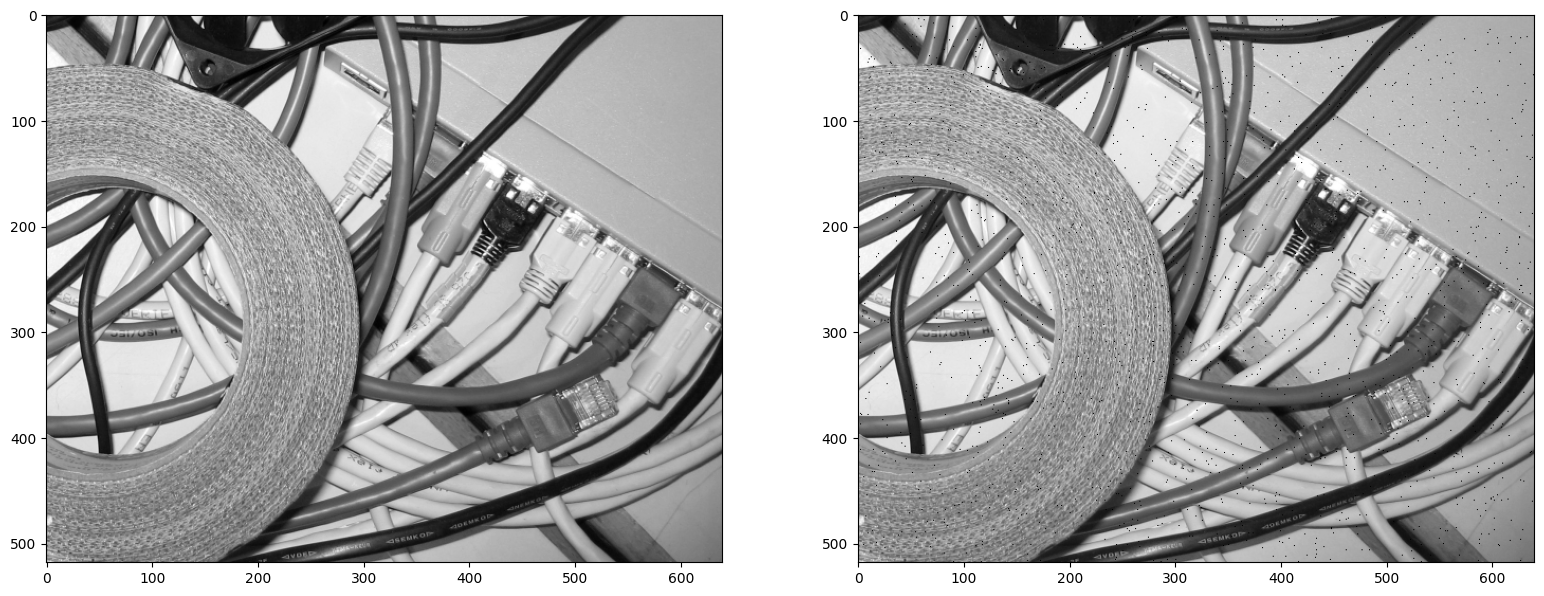

In [27]:
import copy

# @student: implement salt and pepper noise
# hint: using numpy you can set multiple indexes at the same time
# noisy_img[[v0, v1, ..., vn], [u0, u1, ... un]] = 0

def add_salt_and_pepper_noise(img: np.ndarray, percentage: float) -> np.ndarray:
    noisy_img = copy.deepcopy(img) #Creation of a copy to leave the original image untouched
    height = noisy_img.shape[0]
    width = noisy_img.shape[1]
    for i in range(round(height*width*percentage)):
        noisy_img[[np.random.randint(height)],[np.random.randint(width)]] = 0

    return noisy_img


salt_pepper_img = add_salt_and_pepper_noise(gray_img, 0.005)
_, (ax1, ax2) = plt.subplots(1, 2)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(gray_img, cmap="gray")
ax2.imshow(salt_pepper_img, cmap="gray")
plt.show()

#### Part 4: Gaussian Kernel And The Wiener Filter

In order to smooth an image, a gaussian kernel can be used. Implement the gaussian kernel which is given by $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\frac{x^2}{\sigma^2}}$.

In [ ]:
# scipy is a python library for scientific computing
# We will use the scipy.signal.convolve2d() function
# Which has two arguments a data source (in our case an image np.ndarray) and a kernel (np.ndarray)

import scipy.signal

def create_gaussian_kernel(size: int, sigma_squared: float):
    assert size % 2 == 1, "Kernel size must be uneven"

    # @student: implement the gaussian kernel creation
    return ...

gaussian_kernel = create_gaussian_kernel(11, 4.0)
noise_img = scipy.signal.convolve2d(gray_img, gaussian_kernel, mode="same", boundary='fill', fillvalue=0)

_, (ax1, ax2) = plt.subplots(1, 2)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(gray_img, cmap="gray")
ax2.imshow(noise_img, cmap="gray")
plt.show()

After the application of the gaussian filter the image is artificially blured.
We will now use a wiener filter in order to remove the blur.

In [ ]:
from skimage import restoration

# @student: call the restoration.wiener(...) function in order to remove the blur
# https://scikit-image.org/docs/stable/api/skimage.restoration.html#skimage.restoration.wiener
wiener_img = restoration.wiener(...)

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(5 * figure_size)
ax1.imshow(gray_img, cmap="gray")
ax2.imshow(noise_img, cmap="gray")
ax3.imshow(wiener_img, cmap="gray")
plt.show()